In [94]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [95]:
velo = np.fromfile("/home/engineer/Downloads/000000.bin",dtype=np.float32).reshape(-1,4)

In [96]:
print(velo[1:5])

[[18.344  0.106  0.829  0.   ]
 [51.299  0.505  1.944  0.   ]
 [18.317  0.221  0.829  0.   ]
 [18.352  0.251  0.83   0.09 ]]


In [97]:
x = []
y = []
z = []
x=(velo[:,0])
y=(velo[:,1])
z=(velo[:,2])

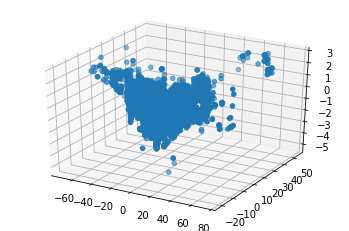

In [5]:
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z);

In [98]:
points = velo

In [309]:
def height_map(points, fr, sr, res): 
    
    x = points[:,0]
    y = points[:,1]
    z = points[:,2]

    fwd = np.logical_and(x > fr[0], x < fr[1])
    side = np.logical_and(y > -sr[1], y < -sr[0])
    indices_ = np.argwhere(np.logical_and(fwd,side)).flatten()

    y_ = (x[indices_]/res).astype(np.int32)
    x_ = (-y[indices_]/res).astype(np.int32)

    y_-= int(np.floor(fr[0]/res))
    x_-= int(np.floor(sr[0]/res))
    x_max = int((sr[1] - sr[0])/res)
    y_max = int((fr[1] - fr[0])/res)
    z_ = z[indices_]
    pixel_values = 255*((z_ - min(z_))/ (max(z_) - min(z_)))

    im_ = np.zeros([y_max,x_max])
    im_[-y_,x_] = pixel_values.astype(np.int32)
    im_ = Image.fromarray(im_)
    return im_

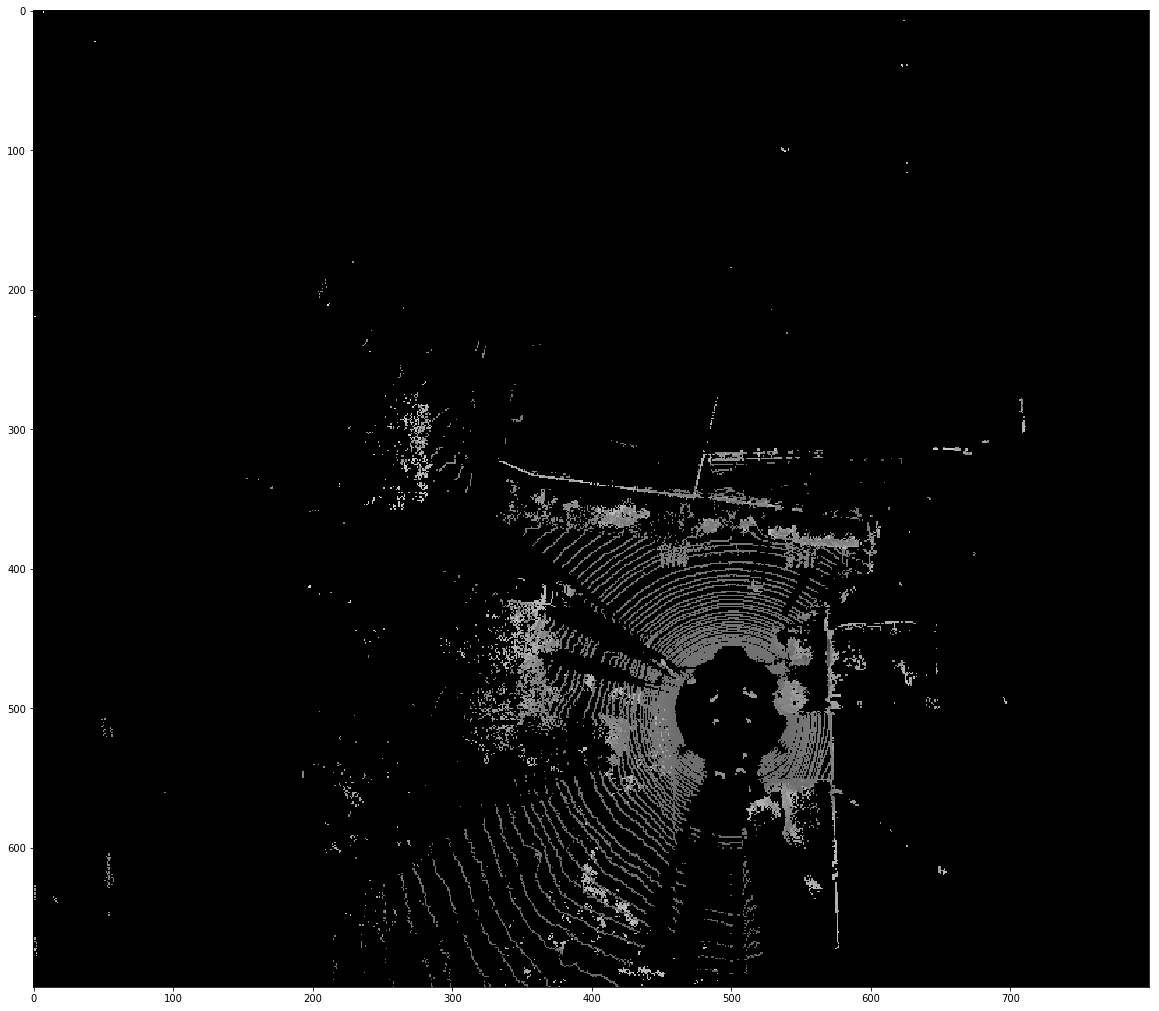

In [311]:
img_height = height_map(velo,[-20,50], [-50,30], 0.1)
plt.figure(figsize=(20,20))
plt.imshow(img_height)

In [307]:
def intensity_map(points, fr, sr, res): 
    
    x = points[:,0]
    y = points[:,1]
    z = points[:,2]
    intensity = points[:,3]   
    
    fwd = np.logical_and(x > fr[0], x < fr[1])
    side = np.logical_and(y > -sr[1], y < -sr[0])
    indices_ = np.argwhere(np.logical_and(fwd,side)).flatten()

    y_ = (x[indices_]/res).astype(np.int32)
    x_ = (-y[indices_]/res).astype(np.int32)

    y_-= int(np.floor(fr[0]/res))
    x_-= int(np.floor(sr[0]/res))
    x_max = int((sr[1] - sr[0])/res)
    y_max = int((fr[1] - fr[0])/res)
    intensity_ = intensity[indices_]
    pixel_values = 255*((intensity_ - min(intensity_))/ (max(intensity_) - min(intensity_)))

    im_ = np.zeros([y_max,x_max])
    im_[-y_,x_] = pixel_values.astype(np.int32)
    im_ = Image.fromarray(im_)
    return im_

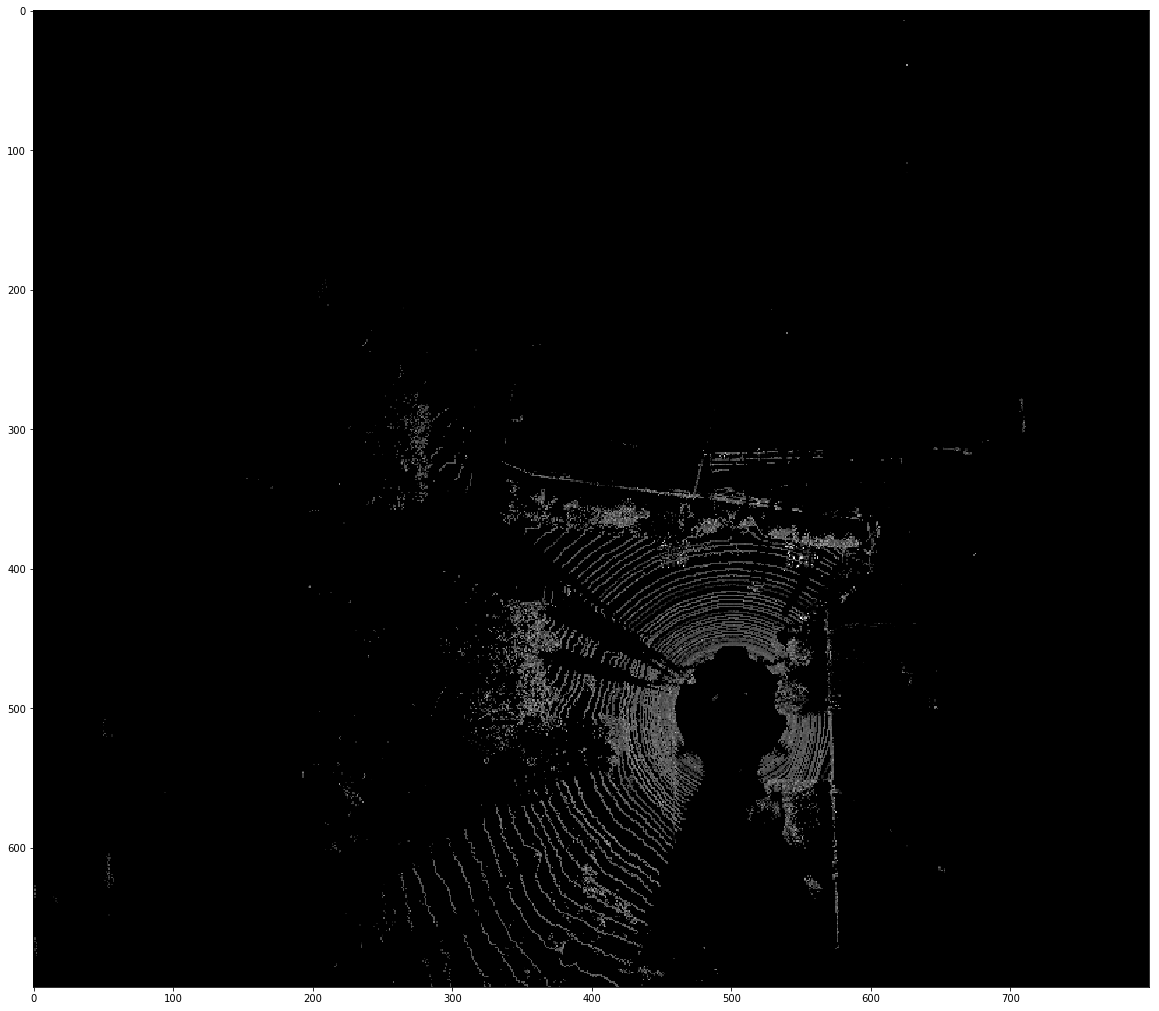

In [312]:
img_intensity = intensity_map(velo,[-20,50], [-50,30], 0.1)
plt.figure(figsize=(20,20))

plt.imshow(img_intensity)

In [276]:
def density_map(points, fr, sr, res): 
    
    x = points[:,0]
    y = points[:,1]
    z = points[:,2]
    intensity = points[:,3]   
    
    fwd = np.logical_and(x > fr[0], x < fr[1])
    side = np.logical_and(y > -sr[1], y < -sr[0])
    indices_ = np.argwhere(np.logical_and(fwd,side)).flatten()

    y_ = (x[indices_]/res).astype(np.int32)
    x_ = (-y[indices_]/res).astype(np.int32)

    y_-= int(np.floor(fr[0]/res))
    x_-= int(np.floor(sr[0]/res))
    x_max = int((sr[1] - sr[0])/res)
    y_max = int((fr[1] - fr[0])/res)
    
    _, index, counts = np.unique(z,axis=0, return_index=True, return_counts=True)
    density = np.minimum(1, np.log(1+counts)/np.log(64))
    
    print(density.shape)
    pixel_values = 255*density
    im_ = np.zeros([y_max,x_max])
    print(y_max)
    for i in range(len(index)):
        if(i in indices_):
            im_[-y_[i],x_[i]] = pixel_values[i].astype(np.int32)
    im_ = Image.fromarray(im_)
    return im_

(3635,)
700


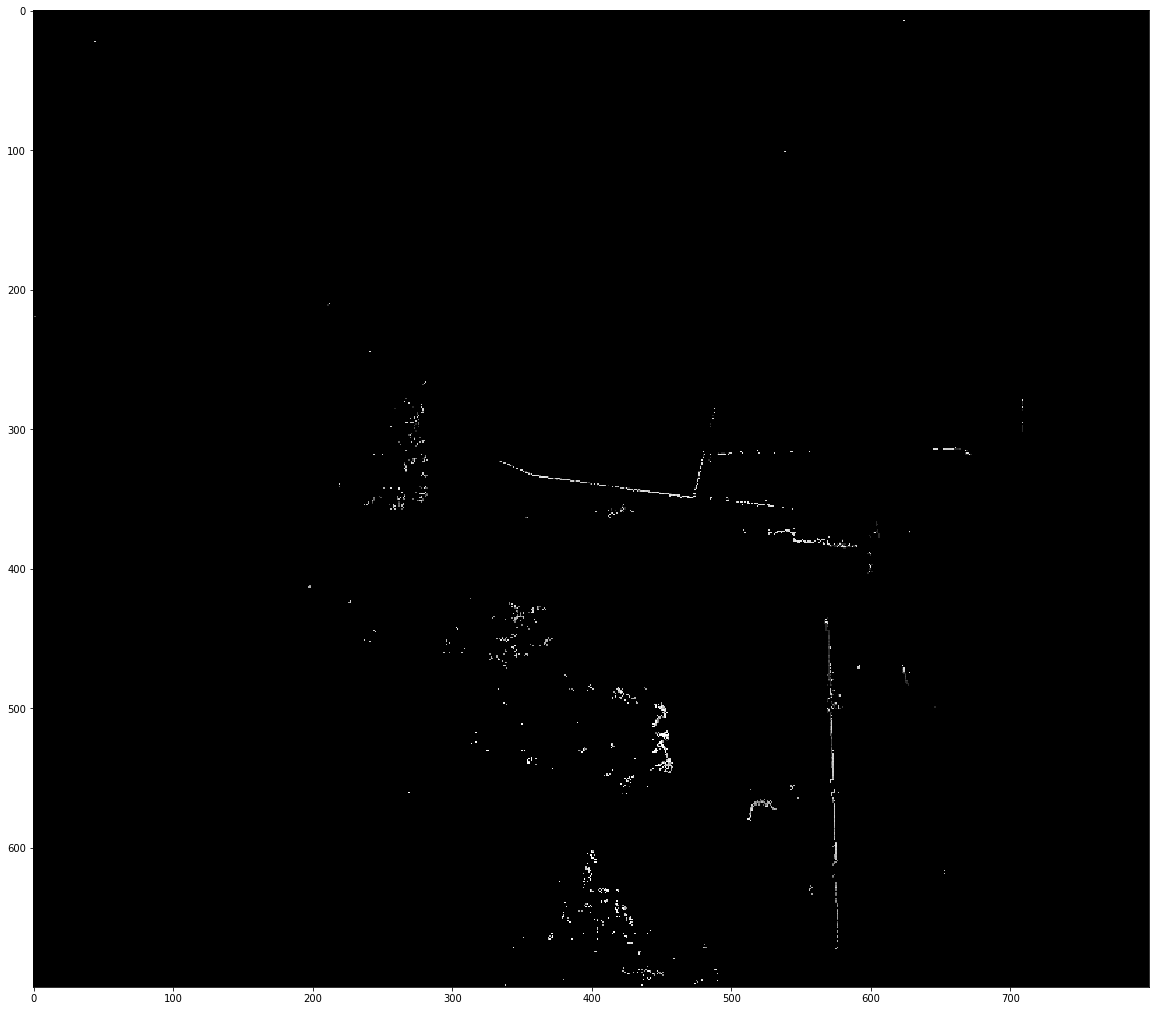

In [313]:
img_density = density_map(velo,[-20,50], [-50,30], 0.1)
plt.figure(figsize=(20,20))
plt.imshow(img_density)

In [314]:
RGB = np.zeros([700,800,3])

In [315]:
RGB[:,:,0] = img_density 
RGB[:,:,1] = img_height
RGB[:,:,2] = img_intensity

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


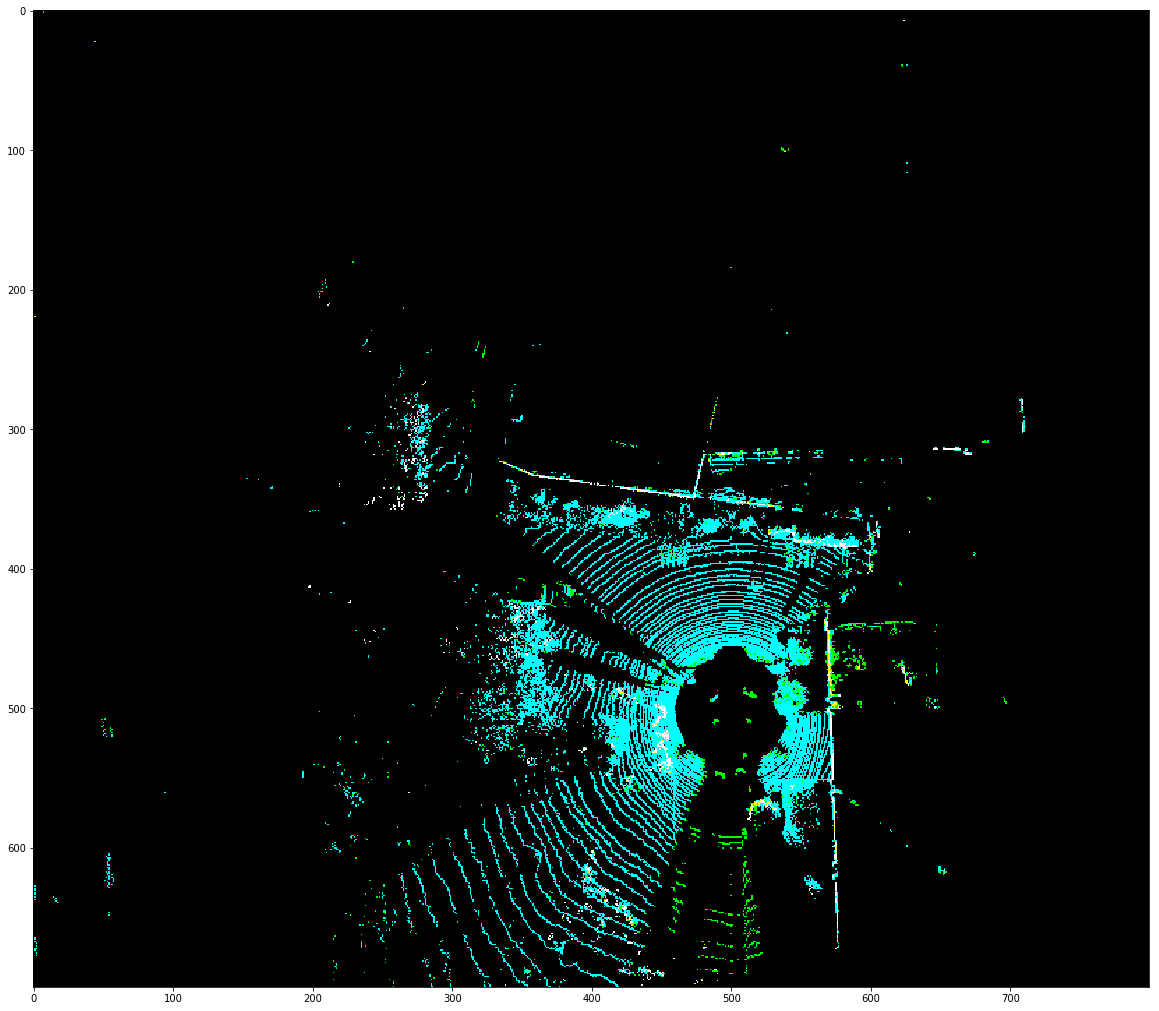

In [316]:
plt.figure(figsize=(20,20))
plt.imshow(RGB)